# **Random Forest Classification (Bonus Part)**

              precision    recall  f1-score   support

    Divorced       1.00      1.00      1.00        40
     Married       0.99      1.00      0.99        69
      Single       1.00      0.99      1.00       103

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



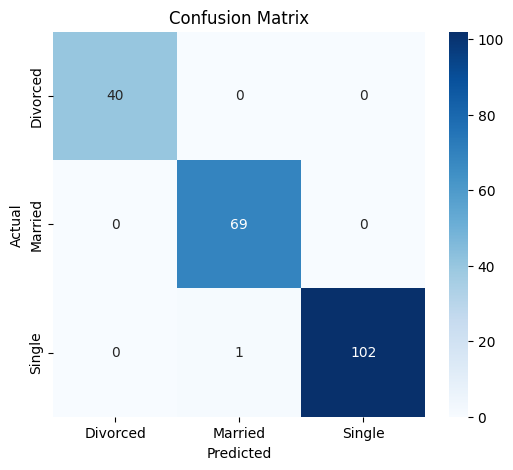

<ipython-input-8-bbcd8f499fcd>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


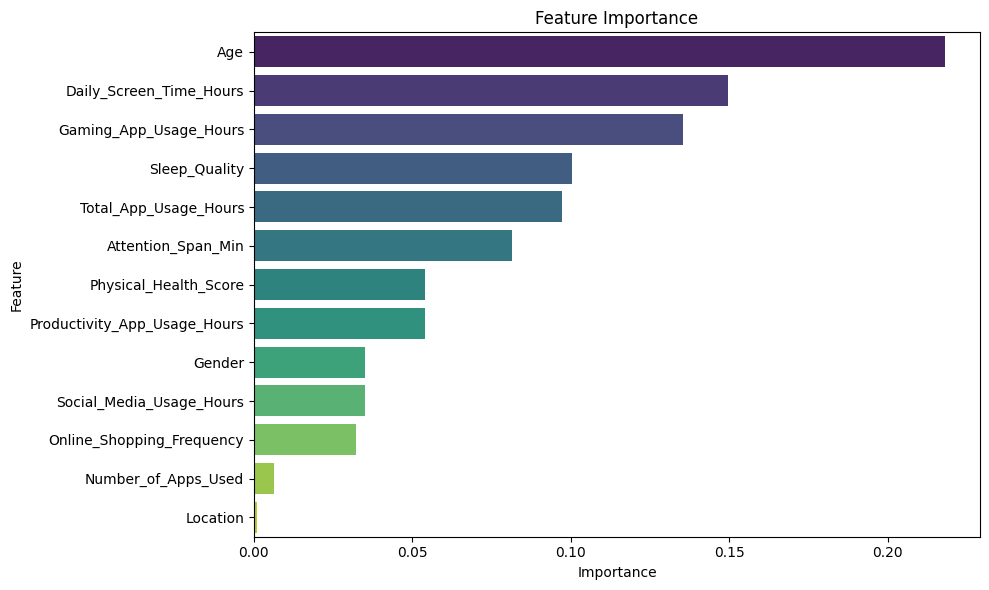

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Sample data based on your dataset
data = pd.read_csv("cleaned_data.csv")

# Drop missing target rows
data = data.dropna(subset=["Relationship_Status"])
data.fillna(data.mean(numeric_only=True), inplace=True)
data.fillna(data.median(numeric_only=True), inplace=True)

# Encode categorical data
label_encoders = {}
for col in ["Gender", "Location", "Relationship_Status"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare data
X = data.drop(columns=["User_ID", "Relationship_Status"])
y = data["Relationship_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoders["Relationship_Status"].classes_
print(classification_report(y_test, y_pred, target_names=label_encoders["Relationship_Status"].classes_))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importances
importances = clf.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# **Decission Tree Visualization**

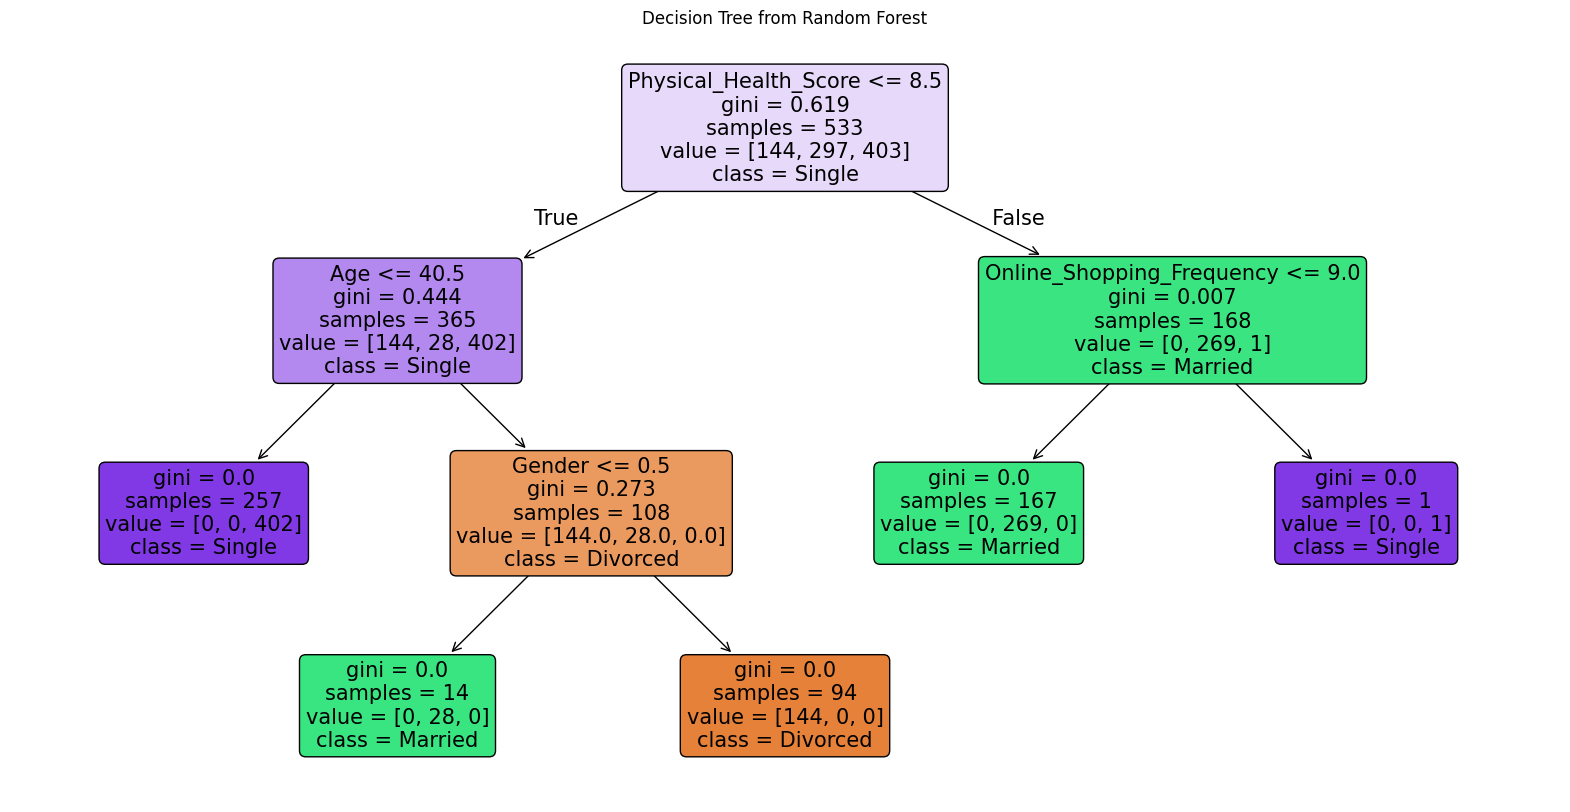

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the decision trees from the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0],
          feature_names=X.columns,
          class_names=label_encoders["Relationship_Status"].classes_,
          filled=True,
          rounded=True,
          max_depth=3)  # limit depth for readability
plt.title("Decision Tree from Random Forest")
plt.show()
